<a href="https://colab.research.google.com/github/michelleabraham-git/Stats_minor/blob/main/Copy_of_CSSL_06_polynomial_regression_bias_variance_tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial regression
Let's try loading a dataset a dataset from Kaggle. To do this, you will need to [create a legacy API key from Kaggle](https://www.kaggle.com/settings). This will download a kaggle.json file.

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nandanaraveendran","key":"d0407d6d10a6f460eff4c642b4a17f58"}'}

In [7]:
# Change the permissions of the kaggle.json file such that only you can read/write the file.
# This is to prevent someone else from modifying the file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!pip install -q kaggle # Install that Kaggle package to interact with Kaggle's datasets; pip is python's package manager

In [9]:
!kaggle datasets download -d mirajdeepbhandari/polynomial-regression

Dataset URL: https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression
License(s): CC0-1.0
  0% 0.00/1.18k [00:00<?, ?B/s]
100% 1.18k/1.18k [00:00<00:00, 4.88MB/s]


In [10]:
!unzip polynomial-regression.zip

Archive:  polynomial-regression.zip
  inflating: Ice_cream selling data.csv  


In [11]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.metrics import PredictionErrorDisplay

In [12]:
os.listdir() # Look for the files/directories within the current directory

['.config',
 'kaggle.json',
 'Ice_cream selling data.csv',
 'polynomial-regression.zip',
 'sample_data']

The Ice_cream selling data.csv is available!

In [13]:
data = pd.read_csv("Ice_cream selling data.csv") # Read the csv file into a pandas dataframe
type(data)

pandas.core.frame.DataFrame

In [14]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [15]:
data.shape

(49, 2)

In [16]:
data.info() # Gives basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [17]:
data.describe() # Gives basic statistics about the columns of the dataframe

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [18]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [19]:
X = data.iloc[:, :-1] #take all rows and columns until -1
y = data.iloc[:, -1]

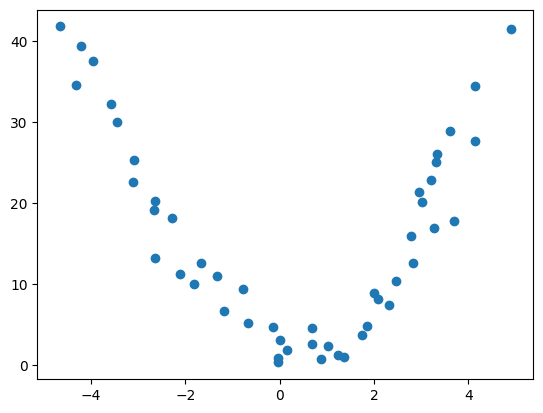

In [20]:
plt.figure()
plt.scatter(X, y)


In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(34, 1) (34,) (15, 1) (15,)


In [22]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [23]:
r2_train =model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
print(r2_train, r2_test)

0.02937510720510217 -0.03912798782600069


In [24]:
help(model.score)


Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.

    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.

    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_s

In [25]:
predict = np.round(model.predict(X_test), decimals = 1)

In [26]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted  Performance" : predict})

,Actual Performance,Predicted Performance
29,0.953115,15.9
4,32.284531,19.7
26,0.789974,16.3
30,3.782570,15.6
32,8.943823,15.4
37,12.568237,14.8
34,7.412094,15.2
40,22.839406,14.5
7,25.365022,19.3
10,13.275828,19.0


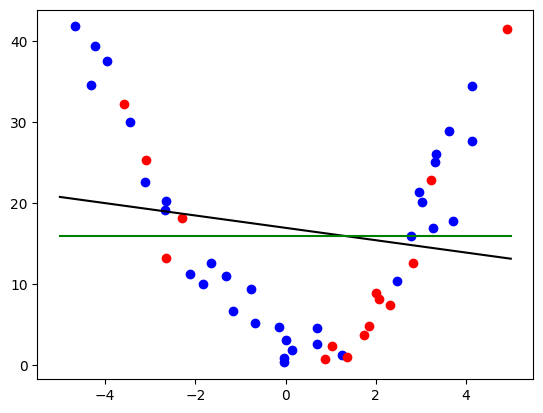

In [30]:
plt.figure()
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='r')
x_values = np.arange(-5,5,0.01)
y_values = model.coef_[0]*x_values + model.intercept_
plt.plot(x_values, y_values,"k")
plt.plot(x_values,[np.mean(y)]*len(x_values),c="g")

In [31]:

r2_score(y_test,predict)

-0.03900093132092275

In [32]:

model.coef_, model.intercept_


(array([-0.76405794]), np.float64(16.962431949649158))

In [33]:
poly_features = PolynomialFeatures(degree=2)
X_transformed= poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state = 0)


#Fit using Linear Regression model
model = LinearRegression()
model.fit(X_train,y_train)

r2_train =model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_error= mean_squared_error(y_train,y_pred_train)
test_error= mean_squared_error(y_test,y_pred_test)

print(r2_train, r2_test)
print(train_error, test_error)

0.933109383805153 0.9112396415848207
9.861627186505526 12.351860655176438


[143.09841013876851] [144.60468995048183]
-0.03912798782600069
[143.09841013876851, 9.861627186505526] [144.60468995048183, 12.351860655176438]
0.9112396415848207
[143.09841013876851, 9.861627186505526, 9.32762657521549] [144.60468995048183, 12.351860655176438, 10.588172153545953]
0.9239134911292493
[143.09841013876851, 9.861627186505526, 9.32762657521549, 8.413880588046377] [144.60468995048183, 12.351860655176438, 10.588172153545953, 10.547045605847865]
0.9242090261272523
[143.09841013876851, 9.861627186505526, 9.32762657521549, 8.413880588046377, 8.322506351123161] [144.60468995048183, 12.351860655176438, 10.588172153545953, 10.547045605847865, 11.422889154269622]
0.9179152223479036
[143.09841013876851, 9.861627186505526, 9.32762657521549, 8.413880588046377, 8.322506351123161, 7.97086018158074] [144.60468995048183, 12.351860655176438, 10.588172153545953, 10.547045605847865, 11.422889154269622, 31.322635297207633]
0.7749158274123696
[143.09841013876851, 9.861627186505526, 9.3276265752

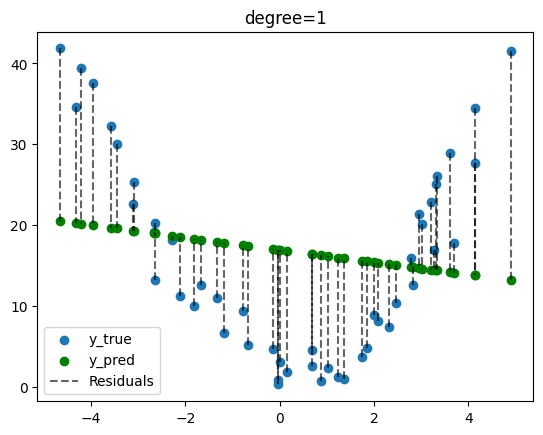

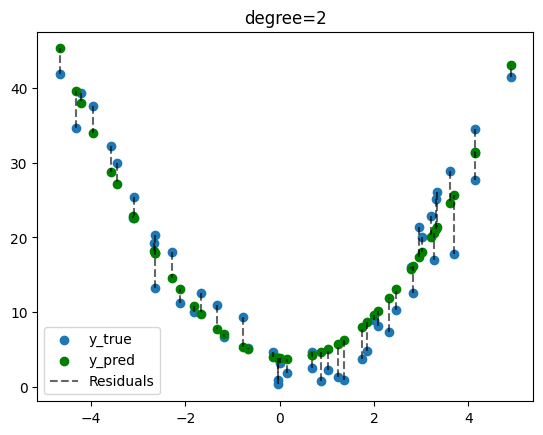

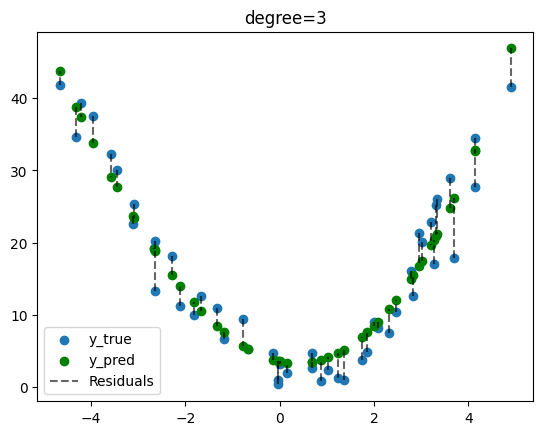

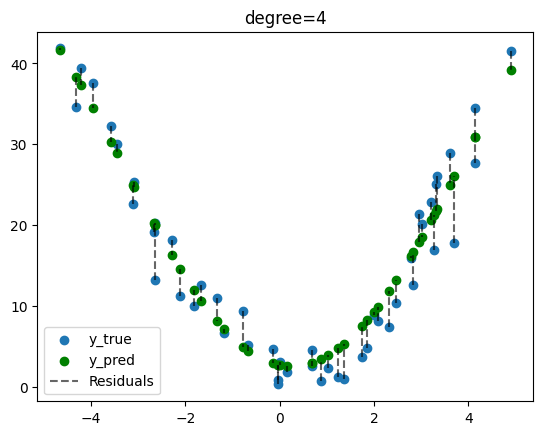

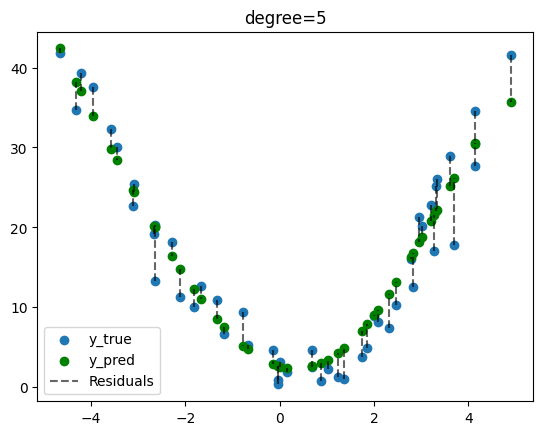

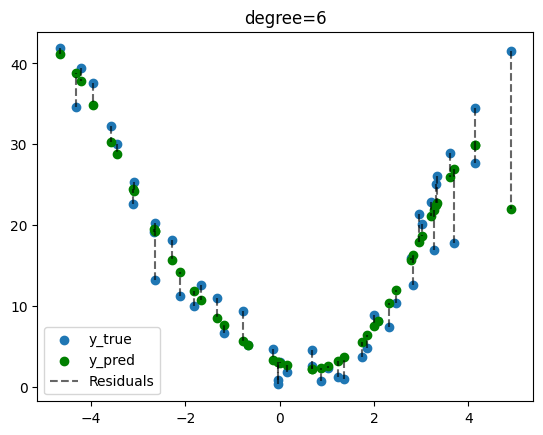

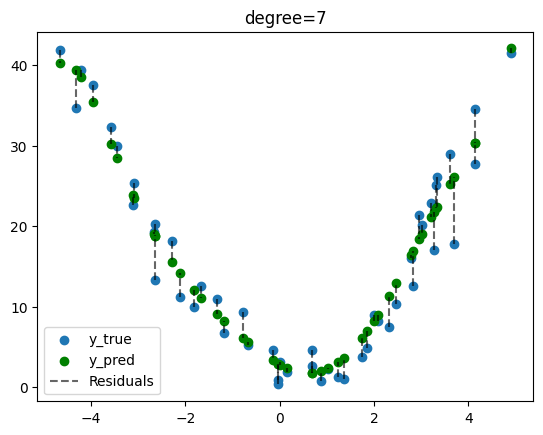

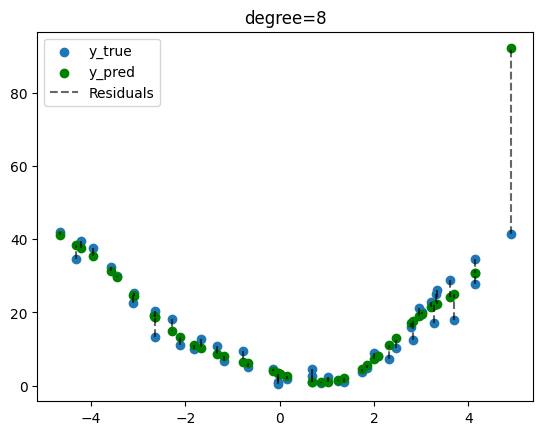

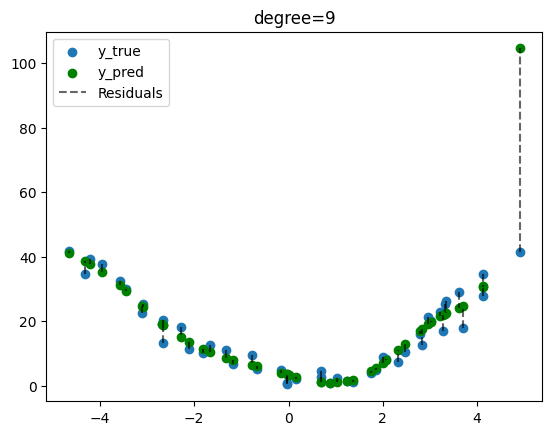

In [34]:
degrees=range(1,10)
train_errors= []
test_errors=[]
for degree in degrees:
  if degree>1:
    poly_features= PolynomialFeatures(degree=degree)
    X_transformed= poly_features.fit_transform(X)

  else:
    X_transformed=X.copy()

  X_train, X_test, y_train, ytest= train_test_split(X_transformed,y, test_size=0.3,random_state=0)
  X_train, X_test, y_train, ytest= train_test_split(X_transformed,y, test_size=0.3,random_state=0)
  model=LinearRegression()
  model.fit(X_train,y_train)
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  y_pred_all = model.predict(X_transformed)
  train_error = mean_squared_error(y_train,y_pred_train)
  train_error = train_errors.append(train_error)
  test_error = mean_squared_error(y_test, y_pred_test)
  test_errors.append(test_error)
  plt.figure()
  plt.scatter(X,y, label='y_true')
  plt.scatter(X,y_pred_all, color='g',label='y_pred')
  plt.vlines(X, y, y_pred_all, color='k',linestyle='--', alpha=0.6,label='Residuals')
  plt.title(f"degree={degree}")
  plt.legend()
  print(train_errors,test_errors)
  print(r2_score(y_test,y_pred_test))

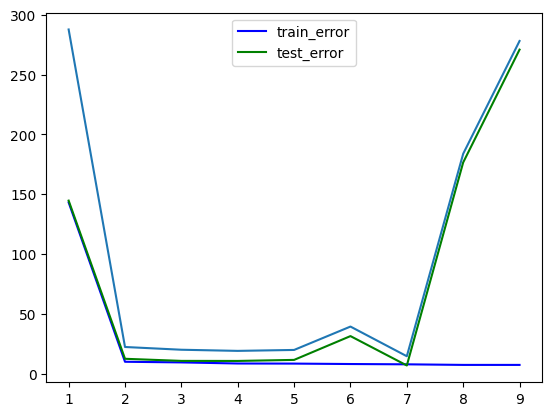

In [35]:
plt.figure()
plt.plot(degrees,train_errors, color = "b", label="train_error")
plt.plot(degrees, test_errors, color = "g", label="test_error")
plt.plot(degrees, np.array(train_errors)+np.array(test_errors))
plt.legend()

In [36]:
type(X.iloc [0,0])

numpy.float64

In [37]:
a = float(5*(10**50))
b = a +1
print(a, b, b-a)

5e+50 5e+50 0.0


In [38]:
X_unscaled = data.iloc[:, :-1]
# Create a new DataFrame 'X_model_input' that contains the single feature we want to use for polynomial regression, which is the scaled temperature.
X_model_input = X_unscaled.copy()
X_model_input['Temperature_Scaled'] = X_model_input['Temperature (°C)'] / 5
X_model_input = X_model_input[['Temperature_Scaled']] # Keep only the scaled column
print ("X_unscaled (original):")
print (X_unscaled.head())
print ("\nX_model_input (scaled single feature for polynomial regression):")
print (X_model_input.head())
y = data.iloc[:, -1]
# Create a range of x values for plotting the smooth regression line.
# This range should be on the original temperature scale.
x_plot_range_unscaled = np.arange(X_unscaled.iloc[:, 0].min(), X_unscaled.iloc[:, 0].max(), 0.01)
# Then, scale this range to prepare it for prediction using the fitted model.
x_predict_range_scaled = pd.DataFrame(data=x_plot_range_unscaled / 5, columns=['Temperature_Scaled'])

X_unscaled (original):
   Temperature (°C)
0         -4.662263
1         -4.316559
2         -4.213985
3         -3.949661
4         -3.578554

X_model_input (scaled single feature for polynomial regression):
   Temperature_Scaled
0           -0.932453
1           -0.863312
2           -0.842797
3           -0.789932
4           -0.715711


[143.09841013876851] [144.60468995048183]
-0.03912798782600069
[143.09841013876851, 9.86162718650552] [144.60468995048183, 12.35186065517645]
0.9112396415848206
[143.09841013876851, 9.86162718650552, 9.32762657521549] [144.60468995048183, 12.35186065517645, 10.58817215354593]
0.9239134911292495
[143.09841013876851, 9.86162718650552, 9.32762657521549, 8.413880588046375] [144.60468995048183, 12.35186065517645, 10.58817215354593, 10.54704560584774]
0.9242090261272532
[143.09841013876851, 9.86162718650552, 9.32762657521549, 8.413880588046375, 8.322506351123163] [144.60468995048183, 12.35186065517645, 10.58817215354593, 10.54704560584774, 11.422889154269111]
0.9179152223479072
[143.09841013876851, 9.86162718650552, 9.32762657521549, 8.413880588046375, 8.322506351123163, 7.970860181580745] [144.60468995048183, 12.35186065517645, 10.58817215354593, 10.54704560584774, 11.422889154269111, 31.322635297176067]
0.7749158274125965
[143.09841013876851, 9.86162718650552, 9.32762657521549, 8.413880588

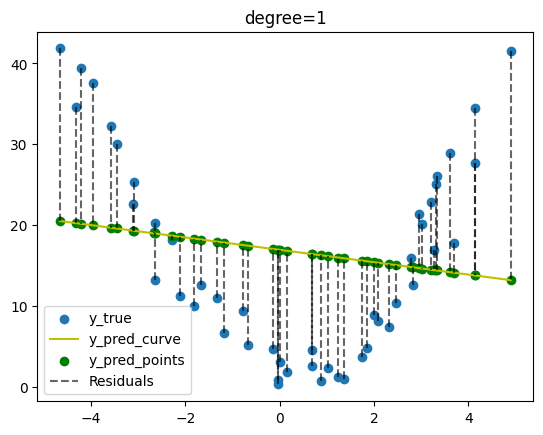

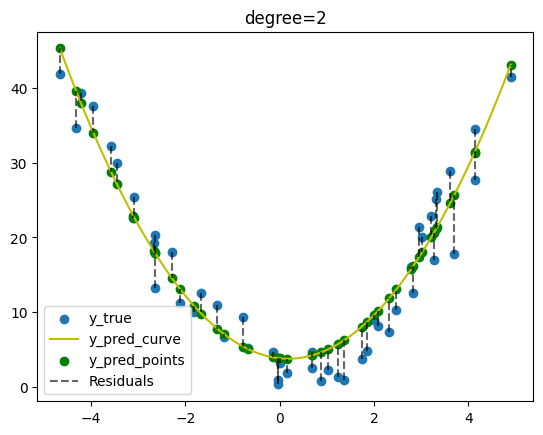

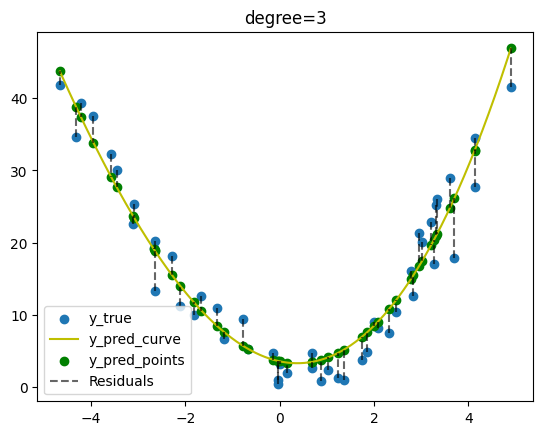

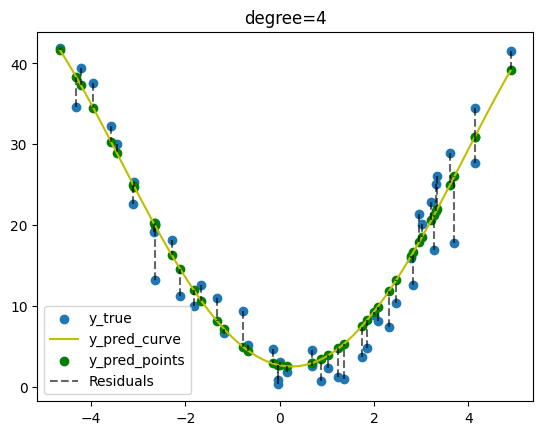

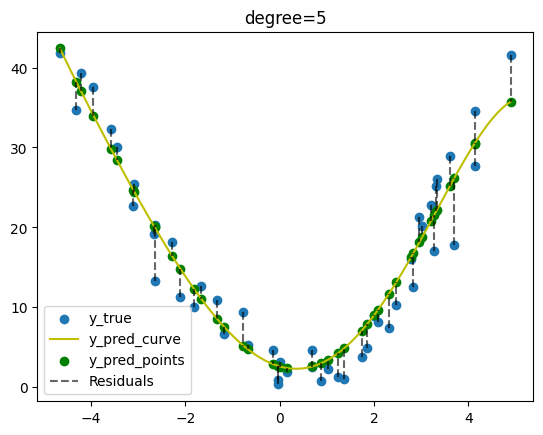

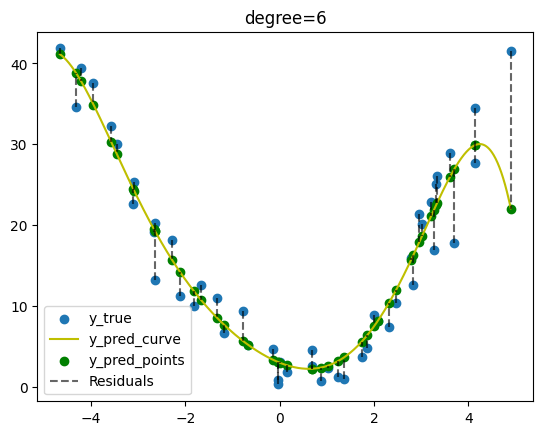

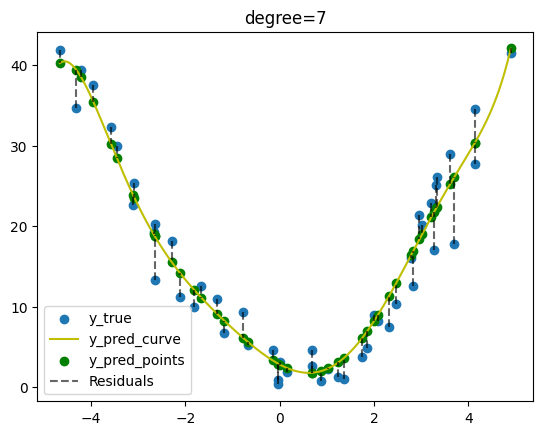

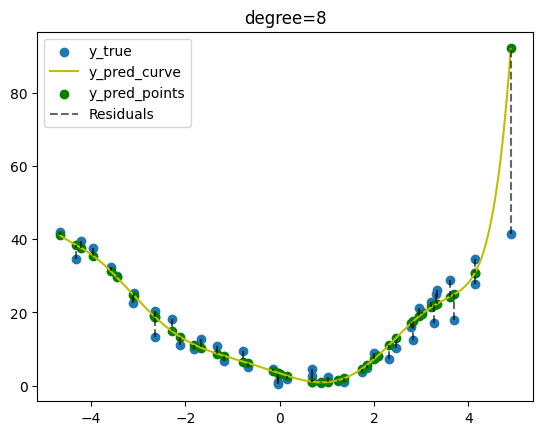

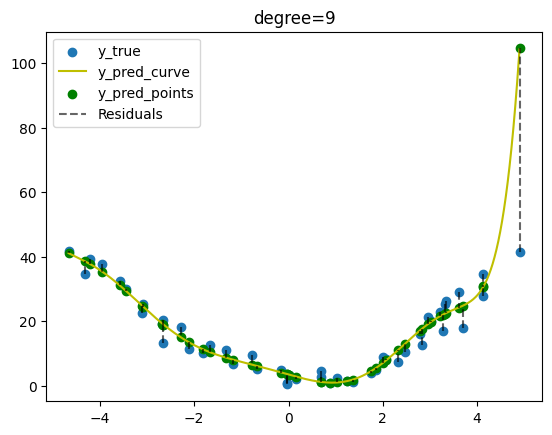

In [39]:

degrees=range(1,10)
train_errors= []
test_errors=[]
for degree in degrees:
  poly_features = PolynomialFeatures(degree=degree)
  # Use X_model_input for fitting, ensure it's a numpy array
  X_transformed = poly_features.fit_transform(X_model_input.values)
  # Use x_predict_range_scaled for transforming, ensure it's a numpy array
  x_predict_range_transformed = poly_features.transform(x_predict_range_scaled.values)
  # Remove the redundant train_test_split line
  X_train, X_test, y_train, ytest= train_test_split(X_transformed, y, test_size=0.3,random_state=0)
  model=LinearRegression()
  model.fit(X_train,y_train)
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  y_pred_all = model.predict(X_transformed) # Predictions for the X_model_input points
  y_predict_range_values = model.predict(x_predict_range_transformed) # Predictions for the dense plot range
  train_error = mean_squared_error(y_train,y_pred_train)
  train_errors.append(train_error)
  test_error = mean_squared_error(y_test, y_pred_test)
  test_errors.append(test_error)
  plt.figure()
  plt.scatter(X_unscaled.iloc[:,0], y, label ="y_true") # Plot original points
  # Plot the smooth regression line using the original range and predicted y values
  plt.plot(x_plot_range_unscaled, y_predict_range_values, color="y", label='y_pred_curve')
  # Plot predicted points for the actual data
  plt.scatter(X_unscaled.iloc[:,0], y_pred_all, color = "g", label = "y_pred_points")
  plt.vlines(X_unscaled.iloc[:,0], y, y_pred_all, color='k',linestyle='--', alpha=0.6,label='Residuals')
  plt.title(f"degree={degree}")
  plt.legend()
  print(train_errors,test_errors)
  print(r2_score(y_test,y_pred_test))

CHECK THE REPOSITORY FROM BHANU PRIYA - THE GRAPHS ABOVE SHOULD BE DIFFERENT
THERE SHOULD BE A YELLOW PLOT SHOWING OVERFIT
